In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import matplotlib.pyplot as plt
gender_submission = pd.read_csv("../../titanic_basic_study/gender_submission.csv")
test = pd.read_csv("../../titanic_basic_study/test.csv")
train = pd.read_csv("../../titanic_basic_study/train.csv")

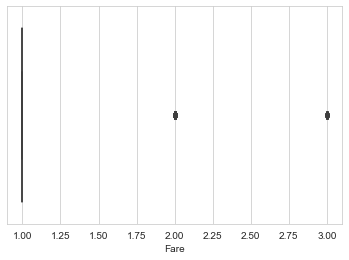

In [50]:
# 观察票价的分布情况
sns.set_style("whitegrid")
# 绘制箱线图
ax = sns.boxplot(x=train["Fare"])

True     687
False    204
Name: null, dtype: int64


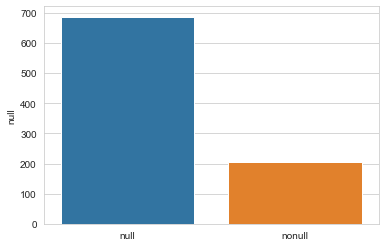

In [53]:
# 观察cabin的缺失情况
sns.set_style("whitegrid")
train["null"] = train["Cabin"].isnull()
print(train["null"].value_counts())
al = sns.barplot(x = ["null","nonull"],y = train["null"].value_counts())

False    889
True       2
Name: null, dtype: int64


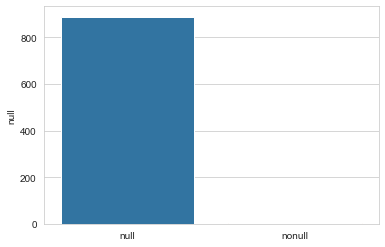

In [66]:
# 观察Embarked的缺失情况
sns.set_style("whitegrid")
dataset["Embarked"].value_counts()
train["null"] = train["Embarked"].isnull()
print(train["null"].value_counts())
al = sns.barplot(x = ["null","nonull"],y = train["null"].value_counts())

In [99]:
# 通过长度来处理名字
train["Name_len"] = train["Name"].apply(len)
test["Name_len"] = test["Name"].apply(len)
# 通过1,0表示男女
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# 对年龄区间进行划分,由于比较多采用列表遍历的方法
for dataset in [train,test]:
    dataset['Age'] = dataset['Age'].fillna(int(18))
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    # 将配偶子女相加成为家庭成员总数，自己也算一个,提取特征叫做isAlone，单独做成一列
    dataset["FamilySize"] = dataset["SibSp"]+dataset["Parch"]+1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    # 将票价划分为高中低三档
    dataset.loc[dataset["Fare"]<=7,"Fare" ] = 1
    dataset.loc[(dataset["Fare"]>7)&(dataset["Fare"] <= 30),"Fare" ] = 2
    dataset.loc[dataset["Fare"] > 50,"Fare"] = 3
    # 将舱位划分为有舱位和缺失舱位
    dataset["Cabin"] = dataset["Cabin"].fillna(int(0))
    dataset.loc[dataset["Cabin"] != 0,"Cabin"] = 1
    # 将登船港口改为简写,因为缺失值只有两个，所以填入S代替
    dataset["Embarked"] = dataset["Embarked"].fillna("S")
    dataset["Embarked"] = dataset["Embarked"].map({"S":1,"C":2,"Q":3}).astype(int)
# 删除不必要的值
drop_data = ["PassengerId","Name","SibSp","Parch","Ticket"]
train = train.drop(drop_data,axis = 1)
test = test.drop(drop_data,axis = 1)


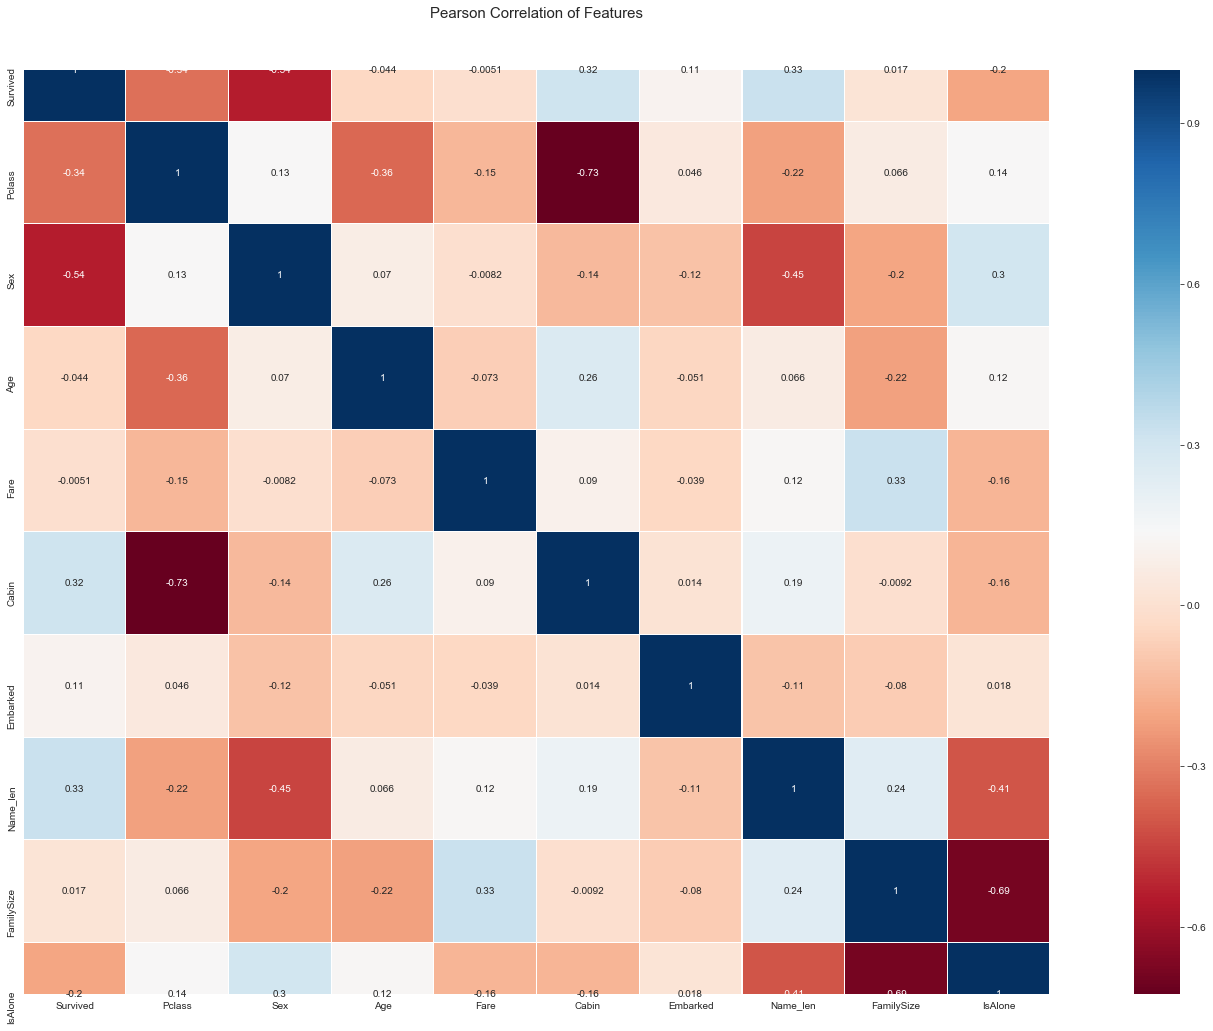

In [116]:
# 数据可视化，查看各个变量间的相关系数
# 图像显示不完整的问题可能是本机bug，云平台相同的代码可以显示完整
colormap = plt.cm.RdBu
f = plt.figure(figsize=(30,17))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

